# مقدمة المشروع

في ظل التطورات السريعة التي يشهدها سوق المال اليوم، أصبح اتخاذ قرارات استثمارية مدروسة ومبنية على أسس كمية وتحليلية أمرًا بالغ الأهمية. يهدف هذا المشروع إلى تقديم إطار شامل للتحليل المالي وإدارة المحافظ الاستثمارية، من خلال دمج عدة مكونات رئيسية تشمل دراسة السوق، بناء المحافظ، تحليل المخاطر، والنمذجة التنبؤية.

**فكرة المشروع:**  
يرتكز المشروع على تحليل البيانات التاريخية لأسهم رائدة خلال العقد الماضي، لفهم سلوكها وتوزيع عوائدها وإحصائياتها الأساسية مثل المتوسط والتقلب والارتباط بين الأسهم. بناءً على هذه الدراسة، يتم اختيار مجموعة من الأسهم وتخصيص رأس مال افتراضي مقداره 100,000 دولار باستخدام تقنيات تحسين المحافظ التي تهدف إلى تحقيق أعلى عائد ممكن مقابل المخاطرة، وذلك عبر تحسين نسبة شارب.

**أهداف المشروع:**  
- **دراسة السوق:**  
  تحليل البيانات التاريخية للأسهم لتحديد خصائص الأداء الإحصائي، مثل حساب العوائد الشهرية، التقلبات، والارتباطات، مما يوفر فهماً معمقاً لسلوك السوق.

- **بناء المحافظ:**  
  اختيار الأسهم الأمثل بناءً على أداءها التاريخي وتوزيع رأس المال (100,000 دولار) بطريقة تضمن تحقيق توازن مثالي بين العائد والمخاطرة، مع فرض قيود على الأوزان (يجب أن تكون الأوزان بين 0 و1 ويكون مجموعها 1).

- **تحليل المخاطر:**  
  تقييم المخاطر باستخدام مؤشرات متقدمة مثل Value-at-Risk (VaR) ومقارنة أداء الحافظة مع مؤشر السوق (مثل S&P 500)، مما يساعد في فهم المخاطر المحتملة واتخاذ القرارات الاستثمارية الصحيحة.

- **النمذجة التنبؤية:**  
  تطبيق نموذج ARIMA لتحليل السلاسل الزمنية والتنبؤ بالعوائد المستقبلية للأسهم، مما يوفر رؤية مستقبلية تساهم في تعديل استراتيجيات الاستثمار بشكل استباقي.

من خلال الجمع بين التحليل الإحصائي العميق والنمذجة التنبؤية، يسعى المشروع إلى دعم المستثمرين والمحللين في اتخاذ قرارات استثمارية مبنية على بيانات موضوعية ورؤى مستقبلية دقيقة، مما يعزز من قدرتهم على إدارة المحافظ المالية في بيئة اقتصادية معقدة ومتغيرة.

# Market Study
## Import Libraries and Define Dates & Tickers

**Explanation:**  
- **Libraries & Setup:**  
  نستورد المكتبات الأساسية مثل `datetime` لجلب التاريخ الحالي والتعامل مع الفترات الزمنية، و`yfinance` لجلب بيانات السوق، و`pandas` لتحليل البيانات.  
- **Tickers:**  
  تم تعريف قائمة الأسهم التي سيتم تحليلها.  
- **Date Range:**  
  يتم تعيين فترة الدراسة إلى آخر 10 سنوات.

**Mathematical Details:**  
- إذا كان \( t \) هو تاريخ اليوم، فإن تاريخ البداية يُحسب كالتالي:  
  $$
  \text{start\_date} = t - (10 \times 365) \text{ days}
  $$
- وتاريخ النهاية هو ببساطة \( t \).

**Assumptions:**  
- تم افتراض أن الفترة الزمنية 10 سنوات توفر رؤية طويلة الأمد للسوق.

In [ ]:
# %% [Cell 1]: Import Libraries and Define Dates & Tickers
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis
from scipy.optimize import minimize
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from IPython.display import display

# Define the list of tickers
tickers = ["AAPL", "MSFT", "NVDA", "AMZN", "GOOGL", "META", "TSLA", "CSCO", "PYPL", "HPQ"]

# Define the time range (last 10 years)
end_date = datetime.today()
start_date = end_date - timedelta(days=10 * 365)  # 10 years ago
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

## Download Market Data and Process Returns

**Explanation:**  
- **Data Download:**  
  يتم تنزيل بيانات الأسعار الشهرية لجميع الأسهم باستخدام مكتبة `yfinance`.
- **Return Calculation:**  
  لكل سهم، يتم حساب العوائد الشهرية عبر حساب النسبة المئوية للتغير بين سعر الإغلاق لشهر \( t \) والشهر السابق \( t-1 \).

**Mathematical Equation:**  
- معادلة العائد الشهري:
  $$
  R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
  $$
  حيث \( P_t \) هو سعر الإغلاق في الشهر \( t \).

**Assumptions:**  
- يُفترض أن البيانات المُنزلة دقيقة وكافية.
- في حال حدوث خطأ أثناء التنزيل، يتم التعامل معه دون توقف التنفيذ.

In [ ]:
# %% [Cell 2]: Download Market Data and Process Returns
try:
    monthly_data = yf.download(tickers=tickers, start=start_date_str, end=end_date_str,
                               interval='1mo', group_by='ticker')
except Exception as e:
    print(f"Error downloading data: {e}")
    monthly_data = None

# Process the data and compute monthly returns for each ticker
if monthly_data is not None:
    for ticker in tickers:
        if ticker in monthly_data.columns.levels[0]:
            ticker_data = monthly_data[ticker].copy()
            ticker_data['Returns'] = ticker_data['Close'].pct_change().dropna()
            for col in ticker_data.columns:
                monthly_data[(ticker, col)] = ticker_data[col]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


## Display Example Data and Basic Statistics

**Explanation:**  
- تُعرض عينة من بيانات سهمٍ واحد (عادةً أول سهم في القائمة) للتحقق من صحة البيانات.
- كما يتم عرض بيانات جميع الأسهم باستخدام `display()` للتحقق من هيكلية البيانات.

**Purpose:**  
- التحقق من جودة البيانات وتحضيرها لمراحل التحليل التالية.

In [ ]:
# %% [Cell 3]: Display Example Data and Basic Statistics
if monthly_data is not None:
    example_ticker = tickers[0]
    print(f"Monthly data for {example_ticker}:")
    print(monthly_data[example_ticker].head())

for ticker, data in monthly_data.items():
    if data is not None:
        print(f"Data for {ticker}:")
        display(data)

Monthly data for AAPL:
Price            Open       High        Low      Close      Volume   Returns
Date                                                                        
2015-04-01  27.875761  30.046504  27.491637  27.949459  3984542000       NaN
2015-05-01  28.161612  29.695873  27.549695  29.095121  3816608400  0.040991
2015-06-01  29.216659  29.465588  27.915949  28.128996  3514426800 -0.033206
2015-07-01  28.458659  29.819921  26.736338  27.202801  4233122400 -0.032927
2015-08-01  27.247651  27.487610  20.631966  25.287615  6427276400 -0.070404
Data for ('META', 'Open'):


Date
2015-04-01     82.186055
2015-05-01     78.938454
2015-06-01     78.998238
2015-07-01     86.439812
2015-08-01     93.174080
                 ...    
2024-10-01    577.514140
2024-11-01    567.152503
2024-12-01    577.034532
2025-01-01    589.719971
2025-02-01    675.909973
Freq: MS, Name: (META, Open), Length: 119, dtype: float64

Data for ('META', 'High'):


Date
2015-04-01     85.264292
2015-05-01     81.538523
2015-06-01     89.059803
2015-07-01     98.862362
2015-08-01     98.364253
                 ...    
2024-10-01    602.464046
2024-11-01    599.176659
2024-12-01    637.885471
2025-01-01    710.789978
2025-02-01    740.909973
Freq: MS, Name: (META, High), Length: 119, dtype: float64

Data for ('META', 'Low'):


Date
2015-04-01     78.021961
2015-05-01     76.497781
2015-06-01     78.360674
2015-07-01     84.905679
2015-08-01     71.726011
                 ...    
2024-10-01    561.067445
2024-11-01    548.607464
2024-12-01    575.106095
2025-01-01    587.820007
2025-02-01    641.859985
Freq: MS, Name: (META, Low), Length: 119, dtype: float64

Data for ('META', 'Close'):


Date
2015-04-01     78.470245
2015-05-01     78.888649
2015-06-01     85.443611
2015-07-01     93.652267
2015-08-01     89.089684
                 ...    
2024-10-01    567.122559
2024-11-01    573.857117
2024-12-01    585.038086
2025-01-01    689.179993
2025-02-01    673.700012
Freq: MS, Name: (META, Close), Length: 119, dtype: float64

Data for ('META', 'Volume'):


Date
2015-04-01    542124600
2015-05-01    421870700
2015-06-01    537740300
2015-07-01    790781000
2015-08-01    709884600
                ...    
2024-10-01    265878300
2024-11-01    237811200
2024-12-01    263222700
2025-01-01    317942200
2025-02-01    268219577
Freq: MS, Name: (META, Volume), Length: 119, dtype: int64

Data for ('AAPL', 'Open'):


Date
2015-04-01     27.875761
2015-05-01     28.161612
2015-06-01     29.216659
2015-07-01     28.458659
2015-08-01     27.247651
                 ...    
2024-10-01    229.015968
2024-11-01    220.484749
2024-12-01    237.009422
2025-01-01    248.656607
2025-02-01    229.990005
Freq: MS, Name: (AAPL, Open), Length: 119, dtype: float64

Data for ('AAPL', 'High'):


Date
2015-04-01     30.046504
2015-05-01     29.695873
2015-06-01     29.465588
2015-07-01     29.819921
2015-08-01     27.487610
                 ...    
2024-10-01    236.968466
2024-11-01    237.287764
2024-12-01    259.814351
2025-01-01    248.826433
2025-02-01    250.000000
Freq: MS, Name: (AAPL, High), Length: 119, dtype: float64

Data for ('AAPL', 'Low'):


Date
2015-04-01     27.491637
2015-05-01     27.549695
2015-06-01     27.915949
2015-07-01     26.736338
2015-08-01     20.631966
                 ...    
2024-10-01    220.843951
2024-11-01    219.227521
2024-12-01    236.899542
2025-01-01    219.139072
2025-02-01    225.699997
Freq: MS, Name: (AAPL, Low), Length: 119, dtype: float64

Data for ('AAPL', 'Close'):


Date
2015-04-01     27.949459
2015-05-01     29.095121
2015-06-01     28.128996
2015-07-01     27.202801
2015-08-01     25.287615
                 ...    
2024-10-01    225.413895
2024-11-01    236.808823
2024-12-01    250.144974
2025-01-01    235.740814
2025-02-01    240.360001
Freq: MS, Name: (AAPL, Close), Length: 119, dtype: float64

Data for ('AAPL', 'Volume'):


Date
2015-04-01    3984542000
2015-05-01    3816608400
2015-06-01    3514426800
2015-07-01    4233122400
2015-08-01    6427276400
                 ...    
2024-10-01     930736000
2024-11-01     891640600
2024-12-01     977916100
2025-01-01    1200291700
2025-02-01     763398213
Freq: MS, Name: (AAPL, Volume), Length: 119, dtype: int64

Data for ('AMZN', 'Open'):


Date
2015-04-01     18.605000
2015-05-01     21.191000
2015-06-01     21.520000
2015-07-01     21.967501
2015-08-01     26.872499
                 ...    
2024-10-01    184.899994
2024-11-01    199.000000
2024-12-01    209.960007
2025-01-01    222.029999
2025-02-01    234.059998
Freq: MS, Name: (AMZN, Open), Length: 119, dtype: float64

Data for ('AMZN', 'High'):


Date
2015-04-01     22.632500
2015-05-01     21.950001
2015-06-01     22.351999
2015-07-01     29.028500
2015-08-01     27.136999
                 ...    
2024-10-01    195.610001
2024-11-01    215.899994
2024-12-01    233.000000
2025-01-01    241.770004
2025-02-01    242.520004
Freq: MS, Name: (AMZN, High), Length: 119, dtype: float64

Data for ('AMZN', 'Low'):


Date
2015-04-01     18.417000
2015-05-01     20.727501
2015-06-01     20.957001
2015-07-01     21.278500
2015-08-01     22.549999
                 ...    
2024-10-01    180.250000
2024-11-01    194.309998
2024-12-01    209.509995
2025-01-01    216.199997
2025-02-01    204.160004
Freq: MS, Name: (AMZN, Low), Length: 119, dtype: float64

Data for ('AMZN', 'Close'):


Date
2015-04-01     21.089001
2015-05-01     21.461500
2015-06-01     21.704500
2015-07-01     26.807501
2015-08-01     25.644501
                 ...    
2024-10-01    186.399994
2024-11-01    207.889999
2024-12-01    219.389999
2025-01-01    237.679993
2025-02-01    214.350006
Freq: MS, Name: (AMZN, Close), Length: 119, dtype: float64

Data for ('AMZN', 'Volume'):


Date
2015-04-01    1688096000
2015-05-01    1039660000
2015-06-01    1099750000
2015-07-01    2041400000
2015-08-01    1657264000
                 ...    
2024-10-01     733878800
2024-11-01     905937900
2024-12-01     760891000
2025-01-01     652629200
2025-02-01     690758883
Freq: MS, Name: (AMZN, Volume), Length: 119, dtype: int64

Data for ('NVDA', 'Open'):


Date
2015-04-01      0.506206
2015-05-01      0.539214
2015-06-01      0.539048
2015-07-01      0.498867
2015-08-01      0.486765
                 ...    
2024-10-01    121.761613
2024-11-01    134.690720
2024-12-01    138.820442
2025-01-01    136.000000
2025-02-01    114.750000
Freq: MS, Name: (NVDA, Open), Length: 119, dtype: float64

Data for ('NVDA', 'High'):


Date
2015-04-01      0.550297
2015-05-01      0.551261
2015-06-01      0.547036
2015-07-01      0.505887
2015-08-01      0.579712
                 ...    
2024-10-01    144.410055
2024-11-01    152.879470
2024-12-01    146.529903
2025-01-01    153.130005
2025-02-01    143.440002
Freq: MS, Name: (NVDA, High), Length: 119, dtype: float64

Data for ('NVDA', 'Low'):


Date
2015-04-01      0.497532
2015-05-01      0.491027
2015-06-01      0.483376
2015-07-01      0.462076
2015-08-01      0.480471
                 ...    
2024-10-01    115.132072
2024-11-01    131.790926
2024-12-01    126.851265
2025-01-01    116.250000
2025-02-01    113.010002
Freq: MS, Name: (NVDA, Low), Length: 119, dtype: float64

Data for ('NVDA', 'Close'):


Date
2015-04-01      0.534877
2015-05-01      0.533191
2015-06-01      0.486765
2015-07-01      0.482892
2015-08-01      0.544131
                 ...    
2024-10-01    132.750854
2024-11-01    138.240479
2024-12-01    134.280746
2025-01-01    120.070000
2025-02-01    131.279999
Freq: MS, Name: (NVDA, Close), Length: 119, dtype: float64

Data for ('NVDA', 'Volume'):


Date
2015-04-01    5673652000
2015-05-01    7081336000
2015-06-01    7333832000
2015-07-01    5480404000
2015-08-01    9469492000
                 ...    
2024-10-01    5627917200
2024-11-01    4498075300
2024-12-01    4085855200
2025-01-01    5950612600
2025-02-01    3900290392
Freq: MS, Name: (NVDA, Volume), Length: 119, dtype: int64

Data for ('GOOGL', 'Open'):


Date
2015-04-01     27.641299
2015-05-01     27.426078
2015-06-01     27.337401
2015-07-01     27.084816
2015-08-01     32.764229
                 ...    
2024-10-01    167.498040
2024-11-01    169.875320
2024-12-01    168.576801
2025-01-01    190.649994
2025-02-01    200.690002
Freq: MS, Name: (GOOGL, Open), Length: 119, dtype: float64

Data for ('GOOGL', 'High'):


Date
2015-04-01     29.129404
2015-05-01     27.811183
2015-06-01     28.178352
2015-07-01     35.537673
2015-08-01     35.072862
                 ...    
2024-10-01    181.811638
2024-11-01    182.281100
2024-12-01    201.189418
2025-01-01    205.479996
2025-02-01    207.050003
Freq: MS, Name: (GOOGL, High), Length: 119, dtype: float64

Data for ('GOOGL', 'Low'):


Date
2015-04-01     26.354463
2015-05-01     26.515878
2015-06-01     26.845184
2015-07-01     26.890521
2015-08-01     29.547390
                 ...    
2024-10-01    159.557144
2024-11-01    163.512602
2024-12-01    168.377033
2025-01-01    187.360001
2025-02-01    171.580704
Freq: MS, Name: (GOOGL, Low), Length: 119, dtype: float64

Data for ('GOOGL', 'Close'):


Date
2015-04-01     27.339392
2015-05-01     27.167517
2015-06-01     26.904470
2015-07-01     32.756256
2015-08-01     32.274006
                 ...    
2024-10-01    170.914124
2024-11-01    168.756592
2024-12-01    189.083298
2025-01-01    204.020004
2025-02-01    172.729996
Freq: MS, Name: (GOOGL, Close), Length: 119, dtype: float64

Data for ('GOOGL', 'Volume'):


Date
2015-04-01     874900000
2015-05-01     648434000
2015-06-01     704328000
2015-07-01    1370858000
2015-08-01    1106942000
                 ...    
2024-10-01     569309100
2024-11-01     529990600
2024-12-01     645610200
2025-01-01     500375500
2025-02-01     540587677
Freq: MS, Name: (GOOGL, Volume), Length: 119, dtype: int64

Data for ('PYPL', 'Open'):


Date
2015-04-01          NaN
2015-05-01          NaN
2015-06-01          NaN
2015-07-01    38.000000
2015-08-01    39.250000
                ...    
2024-10-01    78.209999
2024-11-01    77.864998
2024-12-01    86.550003
2025-01-01    85.834999
2025-02-01    86.500000
Freq: MS, Name: (PYPL, Open), Length: 119, dtype: float64

Data for ('PYPL', 'High'):


Date
2015-04-01          NaN
2015-05-01          NaN
2015-06-01          NaN
2015-07-01    42.549999
2015-08-01    39.910000
                ...    
2024-10-01    83.699997
2024-11-01    88.739998
2024-12-01    93.660004
2025-01-01    93.245003
2025-02-01    89.709999
Freq: MS, Name: (PYPL, High), Length: 119, dtype: float64

Data for ('PYPL', 'Low'):


Date
2015-04-01          NaN
2015-05-01          NaN
2015-06-01          NaN
2015-07-01    33.980000
2015-08-01    30.000000
                ...    
2024-10-01    76.040001
2024-11-01    76.459999
2024-12-01    84.500000
2025-01-01    81.790001
2025-02-01    71.779999
Freq: MS, Name: (PYPL, Low), Length: 119, dtype: float64

Data for ('PYPL', 'Close'):


Date
2015-04-01          NaN
2015-05-01          NaN
2015-06-01          NaN
2015-07-01    38.700001
2015-08-01    35.000000
                ...    
2024-10-01    79.300003
2024-11-01    86.769997
2024-12-01    85.349998
2025-01-01    88.580002
2025-02-01    72.050003
Freq: MS, Name: (PYPL, Close), Length: 119, dtype: float64

Data for ('PYPL', 'Volume'):


Date
2015-04-01            NaN
2015-05-01            NaN
2015-06-01            NaN
2015-07-01    336676500.0
2015-08-01    246871400.0
                 ...     
2024-10-01    234319000.0
2024-11-01    183557900.0
2024-12-01    173298600.0
2025-01-01    164141200.0
2025-02-01    275126879.0
Freq: MS, Name: (PYPL, Volume), Length: 119, dtype: float64

Data for ('MSFT', 'Open'):


Date
2015-04-01     35.040775
2015-05-01     41.928106
2015-06-01     40.880199
2015-07-01     38.621635
2015-08-01     40.810706
                 ...    
2024-10-01    426.738468
2024-11-01    407.376114
2024-12-01    420.726392
2025-01-01    424.678481
2025-02-01    411.600006
Freq: MS, Name: (MSFT, Open), Length: 119, dtype: float64

Data for ('MSFT', 'High'):


Date
2015-04-01     42.756652
2015-05-01     42.212919
2015-06-01     41.496963
2015-07-01     41.175564
2015-08-01     42.052922
                 ...    
2024-10-01    436.748309
2024-11-01    427.614917
2024-12-01    455.247169
2025-01-01    447.482763
2025-02-01    419.309998
Freq: MS, Name: (MSFT, High), Length: 119, dtype: float64

Data for ('MSFT', 'Low'):


Date
2015-04-01     34.626500
2015-05-01     39.718637
2015-06-01     38.169907
2015-07-01     37.631337
2015-08-01     34.504072
                 ...    
2024-10-01    404.676927
2024-11-01    403.949854
2024-12-01    419.818209
2025-01-01    409.898119
2025-02-01    394.244995
Freq: MS, Name: (MSFT, Low), Length: 119, dtype: float64

Data for ('MSFT', 'Close'):


Date
2015-04-01     41.979885
2015-05-01     40.443619
2015-06-01     38.352333
2015-07-01     40.567486
2015-08-01     37.805065
                 ...    
2024-10-01    404.726746
2024-11-01    421.768372
2024-12-01    420.656525
2025-01-01    414.229431
2025-02-01    399.730011
Freq: MS, Name: (MSFT, Close), Length: 119, dtype: float64

Data for ('MSFT', 'Volume'):


Date
2015-04-01    874535300
2015-05-01    633072800
2015-06-01    664853400
2015-07-01    725458100
2015-08-01    776480300
                ...    
2024-10-01    440745500
2024-11-01    442321200
2024-12-01    439902400
2025-01-01    462562700
2025-02-01    378275744
Freq: MS, Name: (MSFT, Volume), Length: 119, dtype: int64

Data for ('HPQ', 'Open'):


Date
2015-04-01    10.616770
2015-05-01    11.066773
2015-06-01    11.136770
2015-07-01    10.164439
2015-08-01    10.251569
                ...    
2024-10-01    34.750175
2024-11-01    35.196453
2024-12-01    35.454300
2025-01-01    32.689999
2025-02-01    31.709999
Freq: MS, Name: (HPQ, Open), Length: 119, dtype: float64

Data for ('HPQ', 'High'):


Date
2015-04-01    11.250109
2015-05-01    11.866781
2015-06-01    11.426773
2015-07-01    10.543135
2015-08-01    10.315244
                ...    
2024-10-01    37.655940
2024-11-01    39.470801
2024-12-01    36.624540
2025-01-01    34.450001
2025-02-01    35.279999
Freq: MS, Name: (HPQ, High), Length: 119, dtype: float64

Data for ('HPQ', 'Low'):


Date
2015-04-01    10.333434
2015-05-01    10.750103
2015-06-01     9.840092
2015-07-01     9.960012
2015-08-01     8.327934
                ...    
2024-10-01    33.867537
2024-11-01    33.252662
2024-12-01    31.874159
2025-01-01    32.220001
2025-02-01    31.049999
Freq: MS, Name: (HPQ, Low), Length: 119, dtype: float64

Data for ('HPQ', 'Close'):


Date
2015-04-01    10.990107
2015-05-01    11.133440
2015-06-01    10.003427
2015-07-01    10.228114
2015-08-01     9.403695
                ...    
2024-10-01    35.226204
2024-11-01    35.136948
2024-12-01    32.360107
2025-01-01    32.500000
2025-02-01    33.830002
Freq: MS, Name: (HPQ, Close), Length: 119, dtype: float64

Data for ('HPQ', 'Volume'):


Date
2015-04-01    481770518
2015-05-01    464403121
2015-06-01    570074677
2015-07-01    610446366
2015-08-01    709819326
                ...    
2024-10-01    135912200
2024-11-01    169431600
2024-12-01    150413500
2025-01-01    122142700
2025-02-01     96127062
Freq: MS, Name: (HPQ, Volume), Length: 119, dtype: int64

Data for ('CSCO', 'Open'):


Date
2015-04-01    20.122509
2015-05-01    21.227733
2015-06-01    21.809818
2015-07-01    20.203554
2015-08-01    21.094326
                ...    
2024-10-01    52.350461
2024-11-01    54.369514
2024-12-01    58.848985
2025-01-01    58.868850
2025-02-01    60.189999
Freq: MS, Name: (CSCO, Open), Length: 119, dtype: float64

Data for ('CSCO', 'High'):


Date
2015-04-01    21.610883
2015-05-01    22.030865
2015-06-01    21.824555
2015-07-01    21.198259
2015-08-01    21.688322
                ...    
2024-10-01    56.243972
2024-11-01    59.464790
2024-12-01    59.822352
2025-01-01    61.898206
2025-02-01    66.500000
Freq: MS, Name: (CSCO, High), Length: 119, dtype: float64

Data for ('CSCO', 'Low'):


Date
2015-04-01    19.776205
2015-05-01    21.139315
2015-06-01    20.137241
2015-07-01    19.776200
2015-08-01    17.099695
                ...    
2024-10-01    51.384477
2024-11-01    54.160932
2024-12-01    56.882386
2025-01-01    57.776292
2025-02-01    59.549999
Freq: MS, Name: (CSCO, Low), Length: 119, dtype: float64

Data for ('CSCO', 'Close'):


Date
2015-04-01    21.242474
2015-05-01    21.596142
2015-06-01    20.233027
2015-07-01    20.940372
2015-08-01    19.215809
                ...    
2024-10-01    53.986721
2024-11-01    58.809258
2024-12-01    58.799324
2025-01-01    60.189846
2025-02-01    64.080002
Freq: MS, Name: (CSCO, Close), Length: 119, dtype: float64

Data for ('CSCO', 'Volume'):


Date
2015-04-01    489815600
2015-05-01    515367400
2015-06-01    507210100
2015-07-01    520262100
2015-08-01    690472400
                ...    
2024-10-01    350534600
2024-11-01    409947200
2024-12-01    412758500
2025-01-01    379917500
2025-02-01    344793735
Freq: MS, Name: (CSCO, Volume), Length: 119, dtype: int64

Data for ('TSLA', 'Open'):


Date
2015-04-01     12.580000
2015-05-01     15.329333
2015-06-01     16.760668
2015-07-01     18.073999
2015-08-01     17.752666
                 ...    
2024-10-01    262.670013
2024-11-01    252.039993
2024-12-01    352.380005
2025-01-01    390.100006
2025-02-01    386.679993
Freq: MS, Name: (TSLA, Open), Length: 119, dtype: float64

Data for ('TSLA', 'High'):


Date
2015-04-01     15.916667
2015-05-01     16.858000
2015-06-01     18.094000
2015-07-01     19.110001
2015-08-01     18.066668
                 ...    
2024-10-01    273.540009
2024-11-01    361.929993
2024-12-01    488.540009
2025-01-01    439.739990
2025-02-01    394.000000
Freq: MS, Name: (TSLA, High), Length: 119, dtype: float64

Data for ('TSLA', 'Low'):


Date
2015-04-01     12.403333
2015-05-01     14.683333
2015-06-01     16.378668
2015-07-01     16.719334
2015-08-01     13.000000
                 ...    
2024-10-01    212.110001
2024-11-01    238.880005
2024-12-01    348.200012
2025-01-01    373.040009
2025-02-01    288.040009
Freq: MS, Name: (TSLA, Low), Length: 119, dtype: float64

Data for ('TSLA', 'Close'):


Date
2015-04-01     15.070000
2015-05-01     16.719999
2015-06-01     17.884001
2015-07-01     17.743334
2015-08-01     16.604000
                 ...    
2024-10-01    249.850006
2024-11-01    345.160004
2024-12-01    403.839996
2025-01-01    404.600006
2025-02-01    290.799988
Freq: MS, Name: (TSLA, Close), Length: 119, dtype: float64

Data for ('TSLA', 'Volume'):


Date
2015-04-01    1484176500
2015-05-01    1336917000
2015-06-01     982096500
2015-07-01    1200915000
2015-08-01    1728961500
                 ...    
2024-10-01    1910807800
2024-11-01    2091913900
2024-12-01    1903365900
2025-01-01    1510656500
2025-02-01    1361783346
Freq: MS, Name: (TSLA, Volume), Length: 119, dtype: int64

Data for ('AAPL', 'Returns'):


Date
2015-04-01         NaN
2015-05-01    0.040991
2015-06-01   -0.033206
2015-07-01   -0.032927
2015-08-01   -0.070404
                ...   
2024-10-01   -0.030429
2024-11-01    0.050551
2024-12-01    0.056316
2025-01-01   -0.057583
2025-02-01    0.019594
Freq: MS, Name: (AAPL, Returns), Length: 119, dtype: float64

Data for ('MSFT', 'Returns'):


Date
2015-04-01         NaN
2015-05-01   -0.036595
2015-06-01   -0.051709
2015-07-01    0.057758
2015-08-01   -0.068094
                ...   
2024-10-01   -0.055659
2024-11-01    0.042106
2024-12-01   -0.002636
2025-01-01   -0.015279
2025-02-01   -0.035003
Freq: MS, Name: (MSFT, Returns), Length: 119, dtype: float64

Data for ('NVDA', 'Returns'):


Date
2015-04-01         NaN
2015-05-01   -0.003153
2015-06-01   -0.087072
2015-07-01   -0.007956
2015-08-01    0.126817
                ...   
2024-10-01    0.093308
2024-11-01    0.041353
2024-12-01   -0.028644
2025-01-01   -0.105829
2025-02-01    0.093362
Freq: MS, Name: (NVDA, Returns), Length: 119, dtype: float64

Data for ('AMZN', 'Returns'):


Date
2015-04-01         NaN
2015-05-01    0.017663
2015-06-01    0.011323
2015-07-01    0.235113
2015-08-01   -0.043383
                ...   
2024-10-01    0.000376
2024-11-01    0.115290
2024-12-01    0.055318
2025-01-01    0.083367
2025-02-01   -0.098157
Freq: MS, Name: (AMZN, Returns), Length: 119, dtype: float64

Data for ('GOOGL', 'Returns'):


Date
2015-04-01         NaN
2015-05-01   -0.006287
2015-06-01   -0.009682
2015-07-01    0.217502
2015-08-01   -0.014722
                ...   
2024-10-01    0.033084
2024-11-01   -0.012623
2024-12-01    0.120450
2025-01-01    0.078995
2025-02-01   -0.153367
Freq: MS, Name: (GOOGL, Returns), Length: 119, dtype: float64

Data for ('META', 'Returns'):


Date
2015-04-01         NaN
2015-05-01    0.005332
2015-06-01    0.083091
2015-07-01    0.096071
2015-08-01   -0.048718
                ...   
2024-10-01   -0.007544
2024-11-01    0.011875
2024-12-01    0.019484
2025-01-01    0.178009
2025-02-01   -0.022461
Freq: MS, Name: (META, Returns), Length: 119, dtype: float64

Data for ('TSLA', 'Returns'):


Date
2015-04-01         NaN
2015-05-01    0.109489
2015-06-01    0.069617
2015-07-01   -0.007866
2015-08-01   -0.064212
                ...   
2024-10-01   -0.045025
2024-11-01    0.381469
2024-12-01    0.170008
2025-01-01    0.001882
2025-02-01   -0.281265
Freq: MS, Name: (TSLA, Returns), Length: 119, dtype: float64

Data for ('CSCO', 'Returns'):


Date
2015-04-01         NaN
2015-05-01    0.016649
2015-06-01   -0.063118
2015-07-01    0.034960
2015-08-01   -0.082356
                ...   
2024-10-01    0.029124
2024-11-01    0.089328
2024-12-01   -0.000169
2025-01-01    0.023649
2025-02-01    0.064631
Freq: MS, Name: (CSCO, Returns), Length: 119, dtype: float64

Data for ('PYPL', 'Returns'):


Date
2015-04-01         NaN
2015-05-01         NaN
2015-06-01         NaN
2015-07-01         NaN
2015-08-01   -0.095607
                ...   
2024-10-01    0.016276
2024-11-01    0.094199
2024-12-01   -0.016365
2025-01-01    0.037844
2025-02-01   -0.186611
Freq: MS, Name: (PYPL, Returns), Length: 119, dtype: float64

Data for ('HPQ', 'Returns'):


Date
2015-04-01         NaN
2015-05-01    0.013042
2015-06-01   -0.101497
2015-07-01    0.022461
2015-08-01   -0.080603
                ...   
2024-10-01   -0.001524
2024-11-01   -0.002534
2024-12-01   -0.079029
2025-01-01    0.004323
2025-02-01    0.040923
Freq: MS, Name: (HPQ, Returns), Length: 119, dtype: float64

## Plot Histogram with Normal Distribution Fit

**Explanation:**  
- **Visualization:**  
  تُرسم هيستوغرامات للعوائد الشهرية لكل سهم.
- **Normal Distribution Fit:**  
  يتم تقدير المتوسط (\( \mu \)) والانحراف المعياري (\( \sigma \)) ومن ثم رسم دالة الكثافة الاحتمالية للتوزيع الطبيعي فوق الهيستوغرام.

**Mathematical Equation:**  
- دالة الكثافة الاحتمالية للتوزيع الطبيعي:
  $$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
  $$

**Key Terms:**  
- **Histogram:** رسم بياني يوضح توزيع البيانات.
- **Normal Distribution:** توزيع يُفترض كثيراً أن العوائد تتبعه.

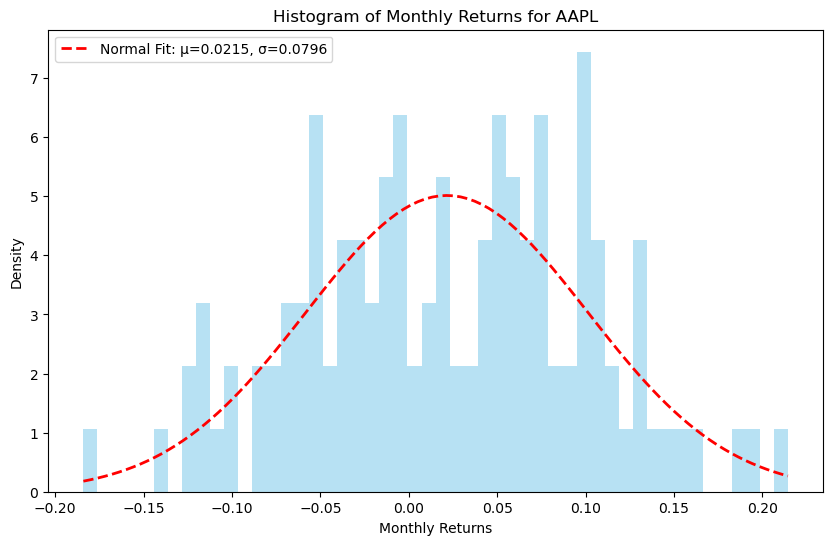

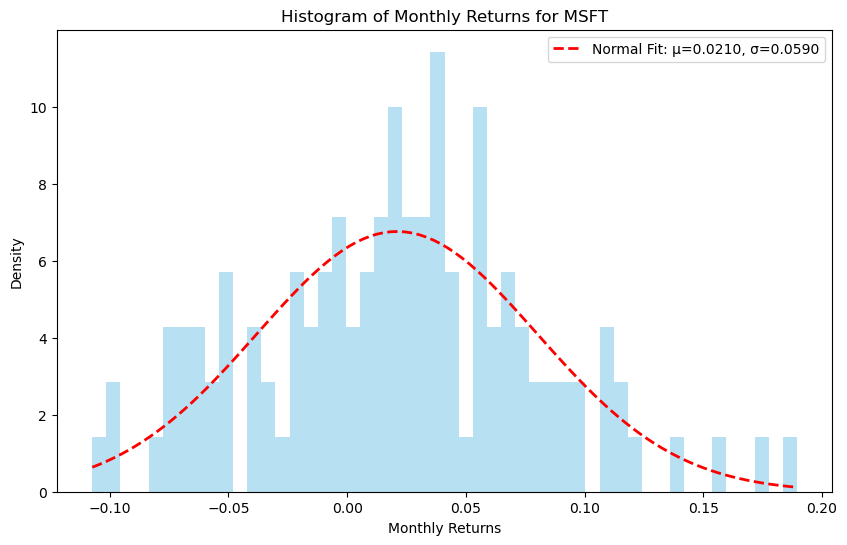

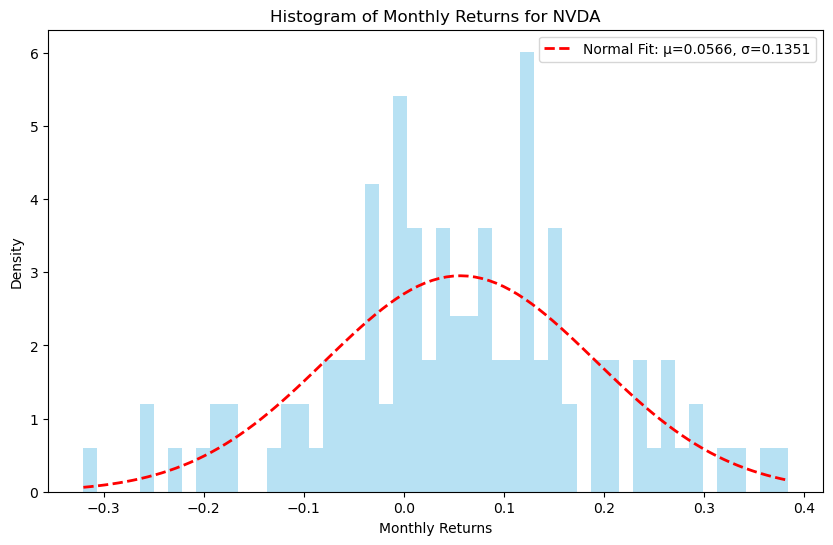

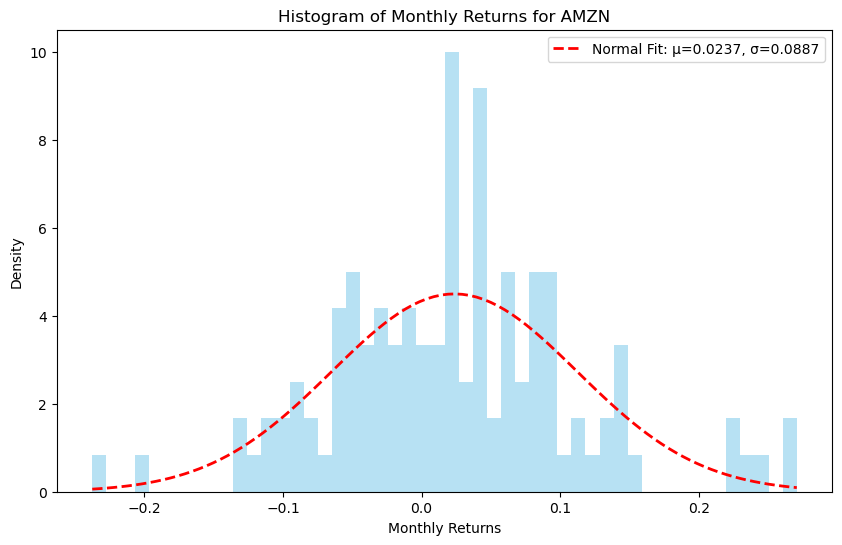

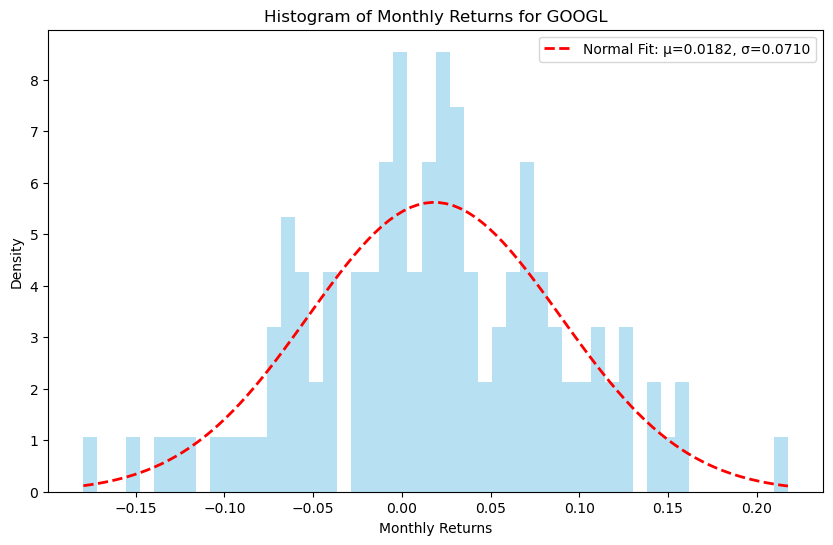

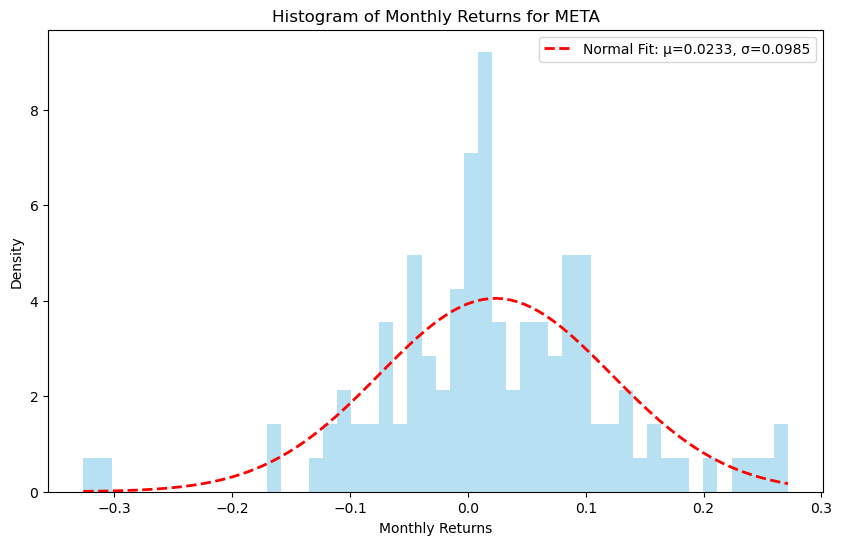

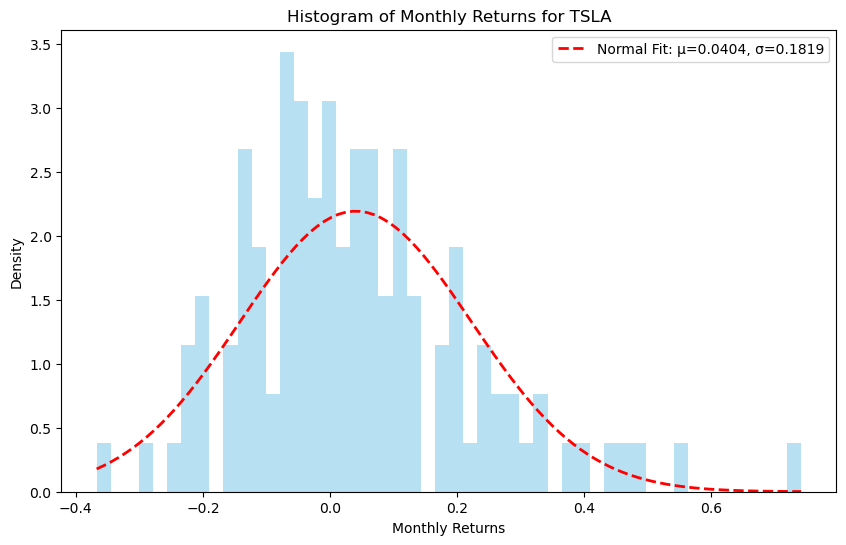

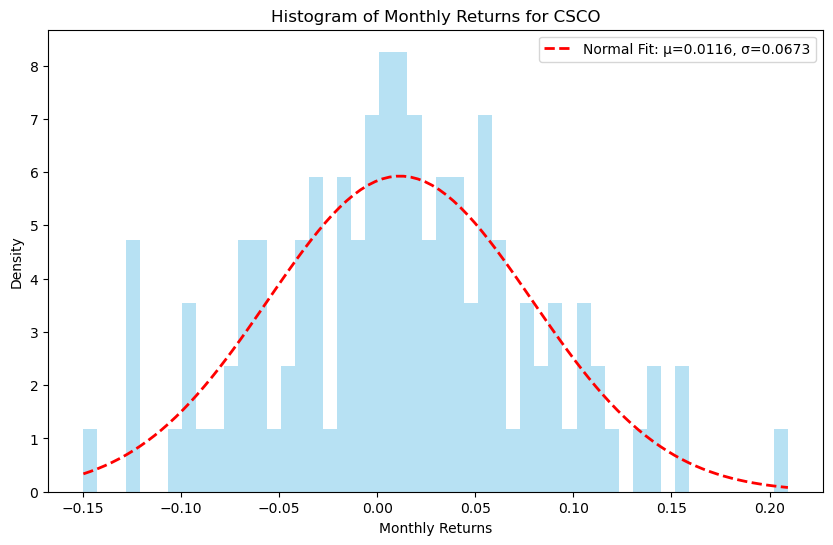

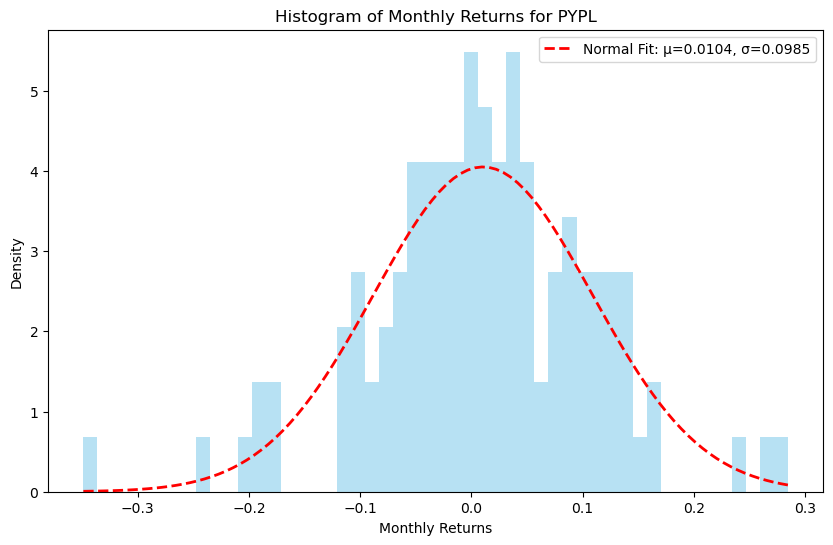

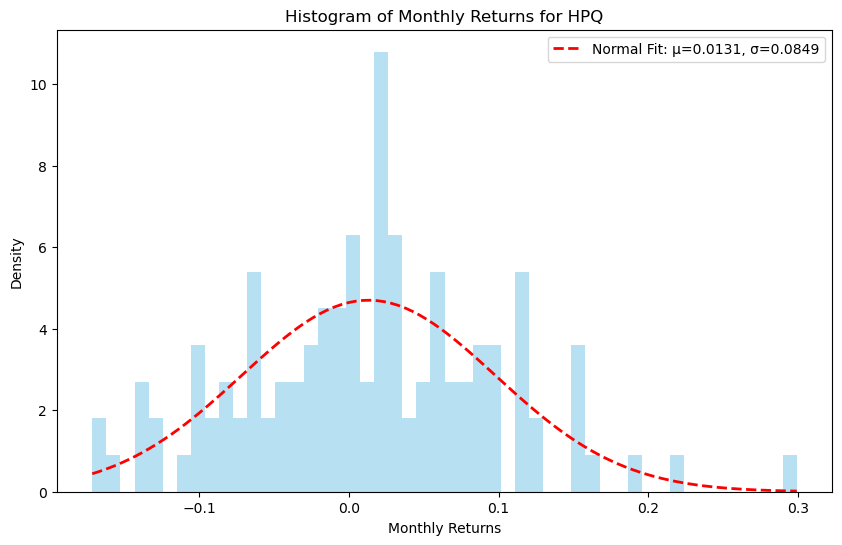

In [ ]:
# %% [Cell 4]: Plot Histogram with Normal Distribution Fit for Monthly Returns
if monthly_data is not None:
    for ticker in tickers:
        returns = monthly_data[ticker]['Returns'].dropna()
        plt.figure(figsize=(10,6))
        count, bins, ignored = plt.hist(returns, bins=50, density=True, alpha=0.6, color='skyblue')
        mu, sigma = norm.fit(returns)
        x = np.linspace(min(bins), max(bins), 100)
        plt.plot(x, norm.pdf(x, mu, sigma), 'r--', linewidth=2,
                 label=f'Normal Fit: μ={mu:.4f}, σ={sigma:.4f}')
        plt.title(f'Histogram of Monthly Returns for {ticker}')
        plt.xlabel('Monthly Returns')
        plt.ylabel('Density')
        plt.legend()
        plt.show()

## Plot Cumulative Returns for Each Ticker

**Explanation:**  
- يتم حساب العوائد التراكمية لكل سهم عبر ضرب (1 + العائد الشهري) عبر الزمن.
- يُظهر المخطط نمو الاستثمار على مدى الفترة الزمنية.

**Mathematical Equation:**  
- إذا كان \( R_t \) هو العائد الشهري، فإن العائد التراكمي حتى الوقت \( T \) يُحسب كالتالي:
  $$
  \text{Cumulative Return} = \prod_{t=1}^{T} (1 + R_t)
  $$

**Assumptions:**  
- يُفترض أن العوائد الشهرية تمثل الأداء الفعلي للسهم عبر الفترة.

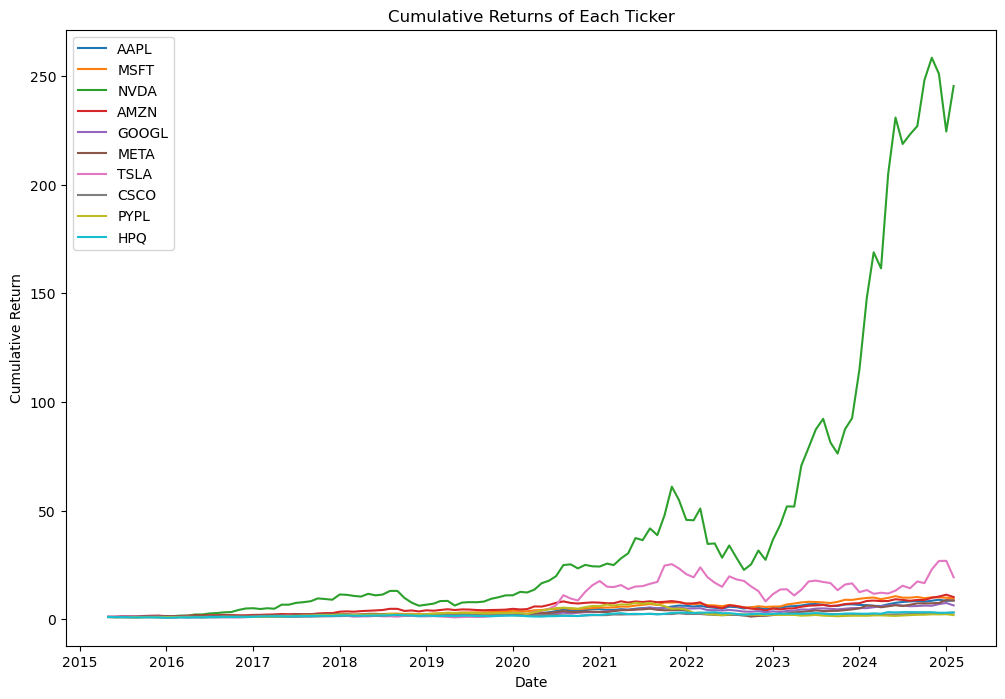

In [ ]:
# %% [Cell 5]: Plot Cumulative Returns for Each Ticker
if monthly_data is not None:
    plt.figure(figsize=(12,8))
    for ticker in tickers:
        data = monthly_data[ticker].dropna(subset=['Close'])
        data['Cumulative Return'] = (1 + data['Returns']).cumprod()
        plt.plot(data.index, data['Cumulative Return'], label=ticker)
    plt.title("Cumulative Returns of Each Ticker")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.show()

## Correlation Matrix Heatmap for Monthly Returns

**Explanation:**  
- يتم إنشاء مصفوفة الارتباط التي تقيس العلاقة بين عوائد الأسهم المختلفة.
- يُستخدم الرسم الحراري (Heatmap) لتصوير هذه العلاقات.

**Mathematical Concept:**  
- معامل الارتباط \( \rho \) بين سهمين \( X \) و \( Y \) يُحسب كالتالي:
  $$
  \rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
  $$

**Assumptions:**  
- تُفترض أن العوائد تمثل بيانات كافية لحساب العلاقات بين الأسهم.

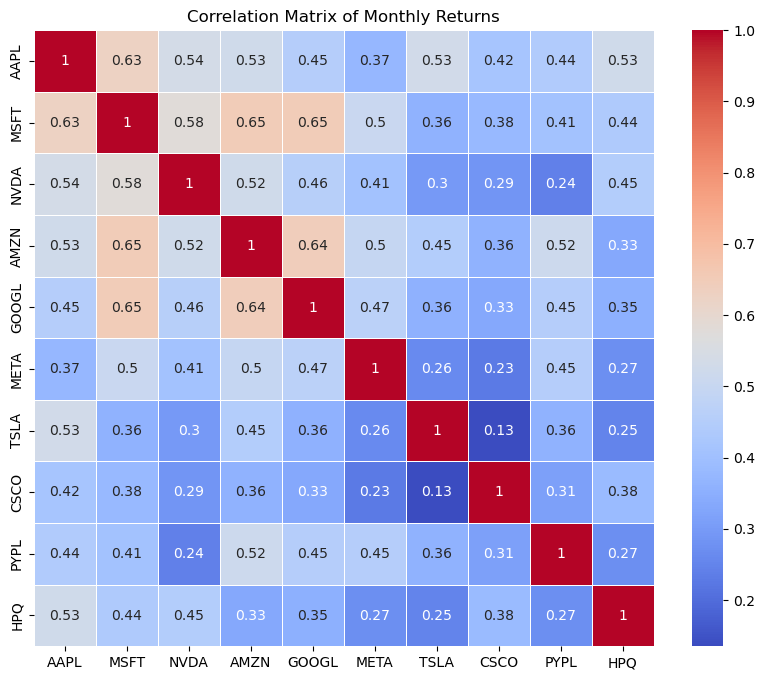

In [ ]:
# %% [Cell 6]: Correlation Matrix Heatmap for Monthly Returns
# Create a DataFrame for returns of all tickers
returns_data = pd.DataFrame()
for ticker in tickers:
    if (ticker, 'Returns') in monthly_data.columns:
        returns_data[ticker] = monthly_data[ticker]['Returns']

plt.figure(figsize=(10,8))
corr_matrix = returns_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Monthly Returns")
plt.show()

# Portfolio Construction
## Compute Mean and Volatility for Each Ticker

**Explanation:**  
- يتم حساب المتوسط (Mean Return) والتقلب (Volatility) لكل سهم.
- تُجمع هذه القيم في جدول لتقديم نظرة سريعة على أداء كل سهم.

**Mathematical Equations:**  
- **Mean Return (\( \mu_i \)) for stock \( i \):**
  $$
  \mu_i = \frac{1}{N}\sum_{t=1}^{N} r_{i,t}
  $$
- **Volatility (\( \sigma_i \)) for stock \( i \):**
  $$
  \sigma_i = \sqrt{\frac{1}{N}\sum_{t=1}^{N} (r_{i,t} - \mu_i)^2}
  $$

**Assumptions:**  
- يتم حساب الإحصائيات بناءً على البيانات التاريخية.

In [ ]:
# %% [Cell 7]: Compute Mean and Volatility for Each Ticker and Create Results Table
results = pd.DataFrame(columns=['Ticker', 'Mean Return', 'Volatility'])

for ticker in tickers:
    if (ticker, 'Returns') in monthly_data.columns:
        ret = monthly_data[(ticker, 'Returns')].dropna()
        mean_ret = ret.mean()
        vol = ret.std()
        results = pd.concat([results, pd.DataFrame([{'Ticker': ticker, 'Mean Return': mean_ret, 'Volatility': vol}])], ignore_index=True)

results['Mean Return'] = results['Mean Return'].map('{:.4f}'.format)
results['Volatility'] = results['Volatility'].map('{:.4f}'.format)
display(results)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_31008\1282417008.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Ticker': ticker, 'Mean Return': mean_ret, 'Volatility': vol}])], ignore_index=True)


,Ticker,Mean Return,Volatility
0,AAPL,0.0215,0.0799
1,MSFT,0.0210,0.0593
2,NVDA,0.0566,0.1356
3,AMZN,0.0237,0.0891
4,GOOGL,0.0182,0.0713
5,META,0.0233,0.0990
6,TSLA,0.0404,0.1827
7,CSCO,0.0116,0.0676
8,PYPL,0.0104,0.0989
9,HPQ,0.0131,0.0853


## Stock Selection and Capital Allocation

**Explanation:**  
- **Capital Assumption:**  
  تم افتراض رأس مال مقداره \$100,000.
- **Stock Selection:**  
  تُختار أفضل 5 أسهم بناءً على أعلى متوسط عائد.
- **Capital Allocation:**  
  يتم توزيع رأس المال بالتساوي بين الأسهم المختارة.

**Mathematical Equation:**  
- **Allocation per stock:**
  $$
  \text{Allocation per stock} = \frac{100,000}{5} = 20,000 \text{ dollars}
  $$

**Assumptions:**  
- تم تبسيط توزيع رأس المال بتقسيمه بالتساوي.

In [ ]:
# %% [Cell 8]: Stock Selection and Capital Allocation
capital = 100000  # $100,000 assumed capital
sorted_by_mean_return = results.sort_values(by='Mean Return', ascending=False)
num_stocks_to_select = 5
selected_stocks = sorted_by_mean_return.head(num_stocks_to_select)['Ticker'].tolist()

allocation = capital / num_stocks_to_select
print(f"Capital: ${capital}")
print(f"Selected Stocks: {selected_stocks}")
print(f"Allocated Capital per Stock: ${allocation:.2f}")

# Save selected stocks and their allocation for later use
selected_stocks_allocation = {stock: allocation for stock in selected_stocks}

Capital: $100000
Selected Stocks: ['NVDA', 'TSLA', 'AMZN', 'META', 'AAPL']
Allocated Capital per Stock: $20000.00


## Portfolio Optimization Using Sharpe Ratio

**Explanation:**  
- **Objective:**  
  تحسين توزيع الأوزان في الحافظة للحصول على أعلى نسبة شارب (Sharpe Ratio)؛ وهي مقياس لمقدار العائد الإضافي لكل وحدة مخاطرة.
- **Optimization Details:**  
  يُحسب العائد المتوقع للحافظة كالتالي:
  $$
  R_p = \sum_{i=1}^{n} w_i \mu_i
  $$
  والتقلب:
  $$
  \sigma_p = \sqrt{w^T \Sigma w}
  $$
  حيث \( \Sigma \) هي مصفوفة التباين-التغاير.
- **Sharpe Ratio:**
  $$
  S = \frac{R_p - R_f}{\sigma_p}
  $$
  مع افتراض \( R_f = 0 \) أثناء عملية التحسين.
- **Constraints:**  
  - يجب أن يكون مجموع الأوزان:
    $$
    \sum_{i=1}^{n} w_i = 1
    $$
  - كل وزن يجب أن يكون بين 0 و 1:
    $$
    0 \leq w_i \leq 1 \quad \forall i
    $$

**Assumptions:**  
- لا يسمح بالبيع على المكشوف (short selling)، أي يجب أن تكون الأوزان غير سالبة.
- يُستخدم التاريخ الماضي لتقدير مصفوفة التباين-التغاير.

In [ ]:
# %% [Cell 9]: Portfolio Optimization Using Sharpe Ratio
# Extract returns for the selected stocks
returns_data_opt = pd.DataFrame()
for stock in selected_stocks_allocation:
    returns_data_opt[stock] = monthly_data[(stock, 'Returns')].dropna()

# Calculate expected returns and covariance matrix
expected_returns = returns_data_opt.mean()
cov_matrix = returns_data_opt.cov()

def sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.0):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(portfolio_return - risk_free_rate) / portfolio_volatility  # Negative for maximization

def constraint_sum_to_one(weights):
    return np.sum(weights) - 1

num_assets = len(selected_stocks_allocation)
initial_weights = np.ones(num_assets) / num_assets
bounds = tuple((0, 1) for _ in range(num_assets))
constraints = ({'type': 'eq', 'fun': constraint_sum_to_one})

result = minimize(sharpe_ratio, initial_weights, args=(expected_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x

portfolio_return = np.dot(optimal_weights, expected_returns)
portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
sharpe_ratio_optimal = (portfolio_return - 0.0) / portfolio_volatility

print("Optimal Weights:")
for stock, weight in zip(selected_stocks_allocation.keys(), optimal_weights):
    print(f"{stock}: {weight:.4f}")
print(f"\nPortfolio Expected Return: {portfolio_return:.4f}")
print(f"Portfolio Volatility: {portfolio_volatility:.4f}")
print(f"Portfolio Sharpe Ratio: {sharpe_ratio_optimal:.4f}")

Optimal Weights:
NVDA: 0.6958
TSLA: 0.1369
AMZN: 0.0029
META: 0.1620
AAPL: 0.0024

Portfolio Expected Return: 0.0488
Portfolio Volatility: 0.1127
Portfolio Sharpe Ratio: 0.4333


## Efficient Frontier Plot

**Explanation:**  
- **Efficient Frontier:**  
  يتم توليد محافظ عشوائية (باستخدام أوزان عشوائية) لحساب العلاقة بين العائد والتقلب.
- **Purpose:**  
  يساعد الرسم على فهم مجموعة المحافظ الممكنة، واختيار الحافظة المثلى التي تعطي أعلى نسبة شارب.
  
**Mathematical Concept:**  
- لكل مجموعة من الأوزان \( \{w_i\} \)، يتم حساب:
  - العائد:
    $$
    R_p = \sum_{i=1}^{n} w_i \mu_i
    $$
  - التقلب:
    $$
    \sigma_p = \sqrt{w^T \Sigma w}
    $$

**Assumptions:**  
- يتم توليد عدد كبير من المحافظ (5000 في هذا المثال) للحصول على منحنى فعال يعكس العلاقة بين المخاطرة والعائد.

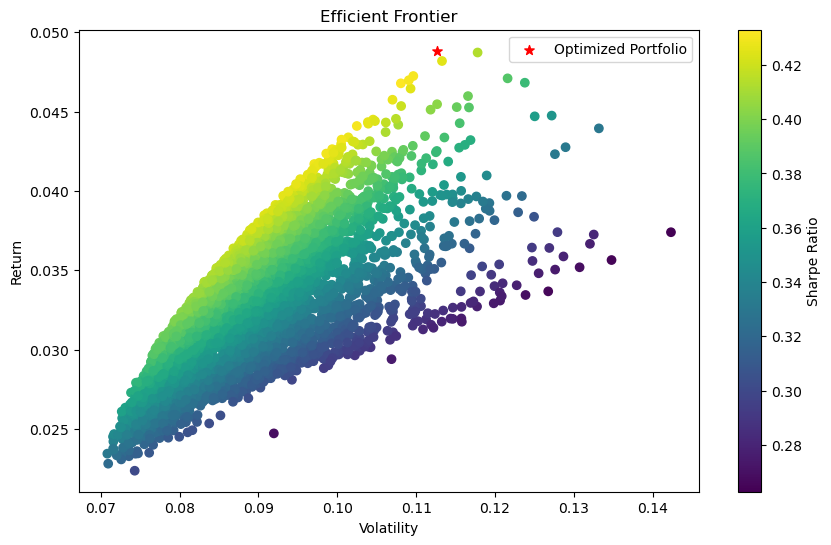

In [ ]:
# %% [Cell 10]: Efficient Frontier Plot
num_portfolios = 5000
all_weights = np.zeros((num_portfolios, num_assets))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    all_weights[i, :] = weights
    ret_arr[i] = np.sum(weights * expected_returns)
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]

plt.figure(figsize=(10,6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.scatter(portfolio_volatility, portfolio_return, c='red', s=50, marker='*', label='Optimized Portfolio')
plt.legend()
plt.show()

## Benchmark Analysis – S&P 500 Data

**Explanation:**  
- يتم استخدام مؤشر S&P 500 كمقياس معياري (Benchmark) لمقارنة أداء الحافظة.
- تُحسب العوائد الشهرية للمؤشر ويتم تقدير المتوسط والتقلب ونسبة شارب له.

**Mathematical Equation:**  
- كما هو الحال مع الأسهم:
  $$
  R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
  $$
- ثم يُحسب المتوسط والتقلب باستخدام نفس الأساليب.

**Assumptions:**  
- يُفترض أن S&P 500 يمثل السوق بشكل جيد.

In [ ]:
# %% [Cell 11]: Benchmark Analysis – S&P 500 Data
benchmark_ticker = "^GSPC"
benchmark_data = yf.download(tickers=benchmark_ticker, start=start_date_str, end=end_date_str, interval='1mo')
benchmark_data['Returns'] = benchmark_data['Close'].pct_change().dropna()
benchmark_mean = benchmark_data['Returns'].mean()
benchmark_volatility = benchmark_data['Returns'].std()
benchmark_sharpe = (benchmark_mean - 0.0) / benchmark_volatility

[*********************100%***********************]  1 of 1 completed


# Risk Analysis
## Comparison Table for Cash, Efficient Portfolio, and Benchmark

**Explanation:**  
- يتم إنشاء جدول يقارن بين:
  1. **Cash:** يُفترض أن السيولة ليس لها عائد ولا تقلب.
  2. **Efficient Portfolio:** المقاييس المحسوبة من الحافظة المُحسنة.
  3. **Benchmark:** مقاييس مؤشر S&P 500.
- **Deviation Metrics:**  
  تُحسب فروقات العائد والتقلب بين الحافظة والمؤشر.
  
**Mathematical Equations:**  
- **Deviation in Return:**
  $$
  \text{Deviation Mean} = R_p - R_{\text{benchmark}}
  $$
- **Deviation in Volatility:**
  $$
  \text{Deviation Volatility} = \sigma_p - \sigma_{\text{benchmark}}
  $$
- **Information Ratio:**
  $$
  \text{IR} = \frac{R_p - R_{\text{benchmark}}}{\text{Tracking Error}}
  $$
  حيث Tracking Error هو انحراف التتبع (التباين في الفرق بين عوائد الحافظة والمؤشر).

**Assumptions:**  
- السيولة (Cash) تعتبر خالية من المخاطرة.

In [ ]:
# %% [Cell 12]: Comparison Table for Cash, Efficient Portfolio, and Benchmark
cash_mean = 0.0
cash_volatility = 0.0
cash_sharpe = 0.0

efficient_portfolio_mean = portfolio_return
efficient_portfolio_volatility = portfolio_volatility
efficient_portfolio_sharpe = sharpe_ratio_optimal

deviation_mean = efficient_portfolio_mean - benchmark_mean
deviation_volatility = efficient_portfolio_volatility - benchmark_volatility

tracking_error = np.sqrt(np.dot(optimal_weights, np.dot(cov_matrix, optimal_weights))) - benchmark_volatility
information_ratio = deviation_mean / tracking_error

table_data = {
    'Cash': [cash_mean, cash_volatility, cash_sharpe],
    'Efficient Portfolio': [efficient_portfolio_mean, efficient_portfolio_volatility, efficient_portfolio_sharpe],
    'Benchmark': [benchmark_mean, benchmark_volatility, benchmark_sharpe],
    'Deviation': [deviation_mean, deviation_volatility, information_ratio]
}
table = pd.DataFrame(table_data, index=['Mean', 'Volatility', 'Performance'])
table.loc['Performance', 'Deviation'] = f"Information Ratio: {information_ratio:.4f}"
display(table.T)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_31008\1716520025.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Information Ratio: 0.5693' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.loc['Performance', 'Deviation'] = f"Information Ratio: {information_ratio:.4f}"


,Mean,Volatility,Performance
Cash,0.0,0.0,0.0
Efficient Portfolio,0.048835,0.112693,0.433349
Benchmark,0.009911,0.044318,0.223634
Deviation,0.038924,0.068375,Information Ratio: 0.5693


## Compute the Risk-Free Rate Using Treasury Data

**Explanation:**  
- **Risk-Free Rate:**  
  يتم حساب معدل العائد الخالي من المخاطرة باستخدام بيانات سندات الخزانة (مثال: سندات 3 أشهر مع رمز ^IRX).
- **Conversion:**  
  تُحسب المعدلات كنسبة مئوية ثم تُحوّل إلى قيمة عشرية.

**Assumptions:**  
- يُفترض أن سندات الخزانة خالية من المخاطرة الائتمانية.

In [ ]:
# %% [Cell 13]: Compute the Risk-Free Rate Using Treasury Data
treasury_data = yf.download("^IRX", start=start_date_str, end=end_date_str, interval='1mo')
risk_free_rate = treasury_data['Close'].mean().iloc[0] / 100
print(f"\nRisk-Free Rate (Annualized): {risk_free_rate:.4f}")

[*********************100%***********************]  1 of 1 completed


Risk-Free Rate (Annualized): 0.0165


## CAPM Analysis – Calculate Beta and Expected Return

**Explanation:**  
- **CAPM Framework:**  
  يستخدم نموذج تسعير الأصول الرأسمالية (CAPM) لحساب العائد المتوقع للحافظة بناءً على معامل بيتا.
  
**Mathematical Equations:**  
- **CAPM Equation:**
  $$
  R_p = R_f + \beta_p (R_m - R_f)
  $$
  حيث:
  - \( R_p \): العائد المتوقع للحافظة.
  - \( R_f \): معدل العائد الخالي من المخاطرة.
  - \( R_m \): العائد السوقي (مستخرج من S&P 500).
  - \( \beta_p \): معامل بيتا للحافظة.
- **Beta Calculation:**
  $$
  \beta_p = \frac{\text{Cov}(R_p, R_m)}{\text{Var}(R_m)}
  $$

**Assumptions:**  
- تُفترض علاقة خطية بين عوائد الحافظة والسوق.
- تُستخدم البيانات التاريخية لتقدير التباين والتغاير.

In [ ]:
# %% [Cell 14]: CAPM Analysis – Calculate Beta and Expected Return
market_return = benchmark_data['Returns'].mean() * 12
portfolio_weights_equal = np.ones(returns_data_opt.shape[1]) / returns_data_opt.shape[1]
portfolio_returns_equal = returns_data_opt.dot(portfolio_weights_equal)

benchmark_returns = benchmark_data['Returns'].dropna()
min_length = min(len(portfolio_returns_equal), len(benchmark_returns))
portfolio_returns_equal = portfolio_returns_equal[:min_length]
benchmark_returns = benchmark_returns[:min_length]

covariance_portfolio_benchmark = np.cov(portfolio_returns_equal, benchmark_returns)[0,1]
market_variance = np.var(benchmark_returns)
portfolio_beta = covariance_portfolio_benchmark / market_variance

portfolio_expected_return_capm = risk_free_rate + portfolio_beta * (market_return - risk_free_rate)

print(f"Portfolio Beta: {portfolio_beta:.4f}")
print(f"Portfolio Expected Return (CAPM): {portfolio_expected_return_capm:.4f}")

Portfolio Beta: 1.4637
Portfolio Expected Return (CAPM): 0.1664


## APT Analysis – Factor Loadings and Expected Return

**Explanation:**  
- **APT Framework:**  
  يعتمد نموذج تسعير التحكيم (APT) على عدة عوامل اقتصادية لتفسير العوائد.
- **Factor Loadings:**  
  يتم تقدير حساسية الحافظة لكل عامل (مثلاً: IEF، GLD، DBC) باستخدام الانحدار.
  
**Mathematical Equation:**  
- النموذج العام:
  $$
  R_p = \lambda_0 + \lambda_1 \beta_1 + \lambda_2 \beta_2 + \cdots + \lambda_k \beta_k
  $$
  حيث:
  - \( \beta_i \): معامل التحميل للعامل \( i \).
  - \( \lambda_i \): علاوة العامل (متوسط العائد المرتبط بالعامل \( i \)).

**Assumptions:**  
- تُفترض أن العوائد تتأثر بمجموعة من العوامل الاقتصادية.

In [ ]:
# %% [Cell 15]: APT Analysis – Factor Loadings and Expected Return
factor_tickers = ["IEF", "GLD", "DBC"]
factor_data = yf.download(factor_tickers, start=start_date_str, end=end_date_str, interval='1mo')['Close']
factor_returns = factor_data.pct_change().dropna()

portfolio_returns_apt = returns_data_opt.dot(portfolio_weights_equal)
aligned_returns = pd.DataFrame({'Portfolio': portfolio_returns_apt}).join(factor_returns, how='inner')

y = aligned_returns['Portfolio']
X = sm.add_constant(aligned_returns[factor_tickers])
model = sm.OLS(y, X).fit()
factor_loadings = model.params[1:]
factor_premiums = factor_returns.mean()
expected_return_apt = factor_loadings.dot(factor_premiums)

print("\nFactor Loadings (Betas):")
print(factor_loadings)
print("\nFactor Premiums:")
print(factor_premiums)
print(f"\nExpected Return (APT): {expected_return_apt:.4f}")

[*********************100%***********************]  3 of 3 completed


Factor Loadings (Betas):
IEF    1.181238
GLD   -0.112440
DBC    0.398841
dtype: float64

Factor Premiums:
Ticker
DBC    0.003972
GLD    0.008138
IEF    0.000827
dtype: float64

Expected Return (APT): 0.0016


## Time Series Comparison – Portfolio vs Benchmark Cumulative Returns

**Explanation:**  
- يُقارن هذا المخطط منحنيات العوائد التراكمية للحافظة المُحسنة ومؤشر S&P 500.
- يساعد ذلك في تقييم النمو النسبي للاستثمار مقابل السوق.

**Mathematical Concept:**  
- يتم حساب العوائد التراكمية باستخدام:
  $$
  \text{Cumulative Return} = \prod_{t=1}^{T} (1 + R_t)
  $$

**Assumptions:**  
- يتم افتراض أن العوائد التاريخية تعكس الأداء المستقبلي إلى حد ما.

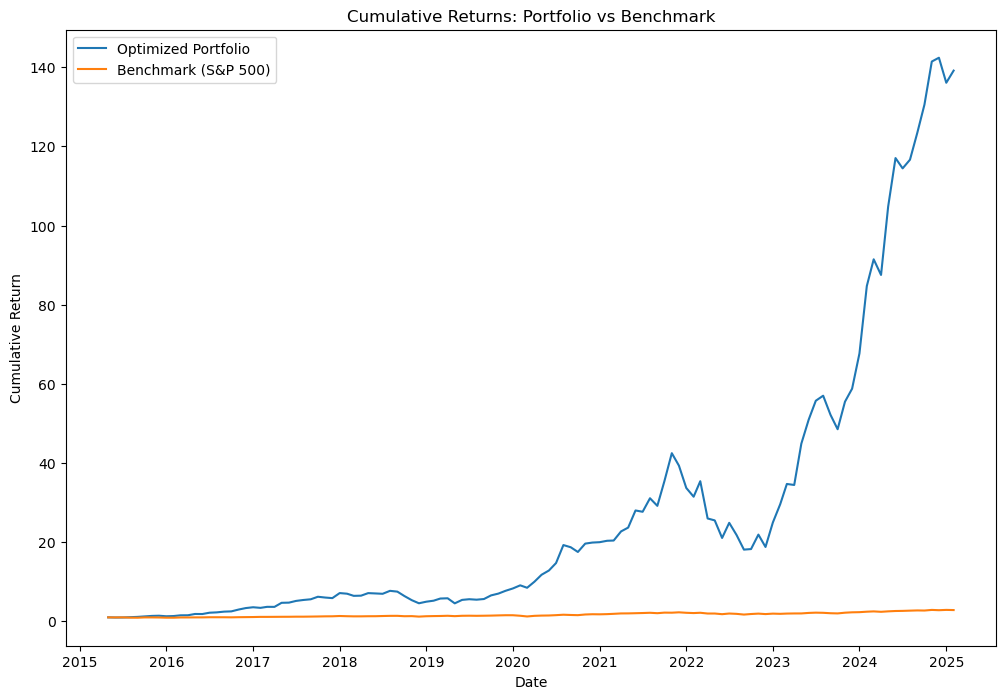

In [ ]:
# %% [Cell 16]: Time Series Comparison – Portfolio vs Benchmark Cumulative Returns
# Compute cumulative returns for the optimized portfolio
portfolio_cum_returns = (1 + returns_data_opt.dot(optimal_weights)).cumprod()

# Compute cumulative returns for the benchmark
benchmark_cum_returns = (1 + benchmark_data['Returns']).cumprod()

plt.figure(figsize=(12,8))
plt.plot(portfolio_cum_returns.index, portfolio_cum_returns, label='Optimized Portfolio')
plt.plot(benchmark_cum_returns.index, benchmark_cum_returns, label='Benchmark (S&P 500)')
plt.title("Cumulative Returns: Portfolio vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

## Risk Metrics Visualization – Value at Risk (VaR)

**Explanation:**  
- **Value at Risk (VaR):**  
  هو مقياس للمخاطرة يُظهر الحد الأدنى للعوائد المحتملة عند مستوى ثقة معين (مثلاً 95%).
- يتم حساب VaR باستخدام النسبة المئوية (مثلاً 5% أدنى العوائد).

**Mathematical Concept:**  
- إذا تم حساب العوائد الشهرية للحافظة، فإن:
  $$
  \text{VaR}_{95} = \text{Percentile}_{5\%}(R_t)
  $$

**Assumptions:**  
- يُفترض أن توزيع العوائد يمكن استخدامه لتقدير المخاطر.

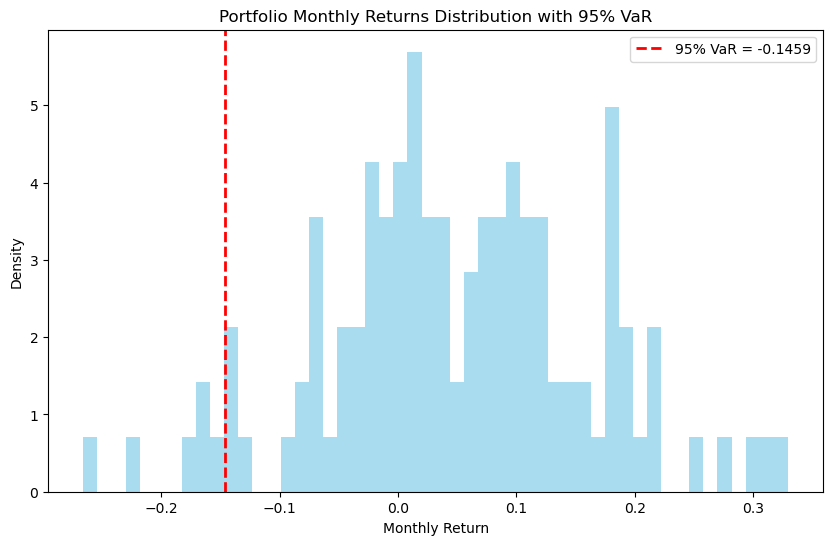

95% Value at Risk (VaR): -0.1459


In [ ]:
# %% [Cell 17]: Risk Metrics Visualization – Value at Risk (VaR)
# Compute historical VaR at 95% confidence level using monthly returns for the optimized portfolio
portfolio_monthly_returns = returns_data_opt.dot(optimal_weights)
VaR_95 = np.percentile(portfolio_monthly_returns.dropna(), 5)

plt.figure(figsize=(10,6))
plt.hist(portfolio_monthly_returns.dropna(), bins=50, alpha=0.7, color='skyblue', density=True)
plt.axvline(VaR_95, color='red', linestyle='--', linewidth=2, label=f'95% VaR = {VaR_95:.4f}')
plt.title("Portfolio Monthly Returns Distribution with 95% VaR")
plt.xlabel("Monthly Return")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f"95% Value at Risk (VaR): {VaR_95:.4f}")

## Test Stationarity using ADF Test

**Explanation:**  
- **ADF Test:**  
  اختبار ديكي فولر الموسع (ADF) يُستخدم للتحقق مما إذا كانت سلسلة زمنية مستقرة (Stationary).
- في هذا المثال، نختبر استقرارية عوائد سهم (مثلاً AAPL) قبل تطبيق نموذج ARIMA.

**Mathematical Concept:**  
- الفرضية الصفرية (\( H_0 \)): السلسلة غير مستقرة.
- إذا كانت قيمة الـ p أقل من 0.05، يمكن رفض \( H_0 \) والاعتبار بأن السلسلة مستقرة.

**Assumptions:**  
- يجب أن تكون السلسلة الزمنية مستقرة لتطبيق نموذج ARIMA دون الحاجة للفروق (d=0).

In [ ]:
# %% [Cell 18]: Test Stationarity using ADF Test for ARIMA
# Select a ticker for the predictive model (e.g., AAPL)
predict_ticker = "AAPL"
ts = monthly_data[predict_ticker]['Returns'].dropna()

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(ts)
print("ADF Statistic: {:.4f}".format(adf_result[0]))
print("p-value: {:.4f}".format(adf_result[1]))
if adf_result[1] < 0.05:
    print("The series is likely stationary.")
else:
    print("The series may be non-stationary; consider differencing or transformation.")

ADF Statistic: -8.5896
p-value: 0.0000
The series is likely stationary.


# Predictive Model
## Predictive Model using ARIMA for a Selected Ticker

**Explanation:**  
- **ARIMA Model:**  
  يستخدم النموذج لتنبؤ السلاسل الزمنية بناءً على ثلاث مكونات: AR (اعتماد ذاتي)، I (تكامل/فرق)، MA (متوسط متحرك).  
- هنا، يتم تطبيق نموذج ARIMA بترتيب (1, 0, 1) على عوائد سهم (AAPL).

**Mathematical Equations:**  
- النموذج:  
  $$
  \text{ARIMA}(1,0,1): \quad X_t = c + \phi X_{t-1} + \theta \varepsilon_{t-1} + \varepsilon_t
  $$  
- يتم استخدام النموذج للتنبؤ بـ \( \hat{X}_{t+h} \) للأشهر القادمة.

**Assumptions:**  
- نفترض أن السلسلة مستقرة (بناءً على نتيجة اختبار ADF).  
- الترتيب (1,0,1) تم اختياره افتراضيًا؛ ويمكن تحسينه باستخدام تحليل مخططات ACF وPACF.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_31008\1562031188.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='M')[1:]


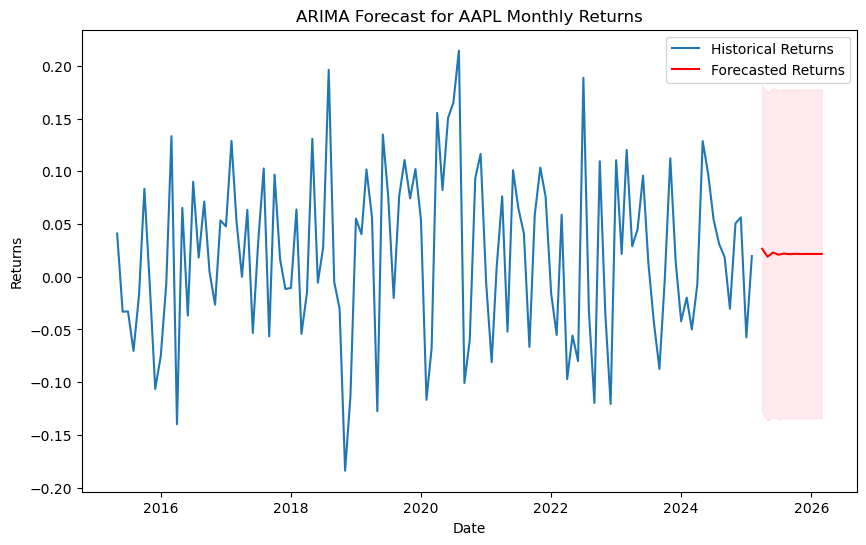

In [ ]:
# %% [Cell 19]: Predictive Model using ARIMA for a Selected Ticker
# Assuming the series is stationary or has been transformed appropriately
model = ARIMA(ts, order=(1, 0, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast_steps = 12
forecast_obj = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_obj.predicted_mean
forecast_conf_int = forecast_obj.conf_int()

# Create forecast dates
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='M')[1:]

plt.figure(figsize=(10,6))
plt.plot(ts.index, ts, label="Historical Returns")
plt.plot(forecast_index, forecast_mean, label="Forecasted Returns", color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title(f"ARIMA Forecast for {predict_ticker} Monthly Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()

## ARIMA Residual Diagnostics

**Explanation:**  
- يتم تحليل بواقي النموذج (Residuals) للتأكد من أن النموذج قد تم تطبيقه بشكل صحيح.
- تُعرض الرسوم البيانية التالية:
  - توزيع البواقي (Histogram & Boxplot).
  - مخطط Q-Q (للتحقق من التوزيع الطبيعي للبواقي).
  - مخطط ACF للبواقي (للتحقق من عدم وجود نمط متبقي).

**Mathematical Concept:**  
- إذا كانت بواقي النموذج تتبع توزيعًا طبيعيًا مع متوسط 0، فإن ذلك يشير إلى ملائمة النموذج.
- لا يجب أن تظهر بواقي النموذج ارتباط زمني كبير (أي ACF للبواقي يجب أن تكون ضمن حدود الثقة).

**Assumptions:**  
- يُفترض أن بواقي النموذج لا تحتوي على معلومات مفقودة يمكن استخدامها لتحسين النموذج.

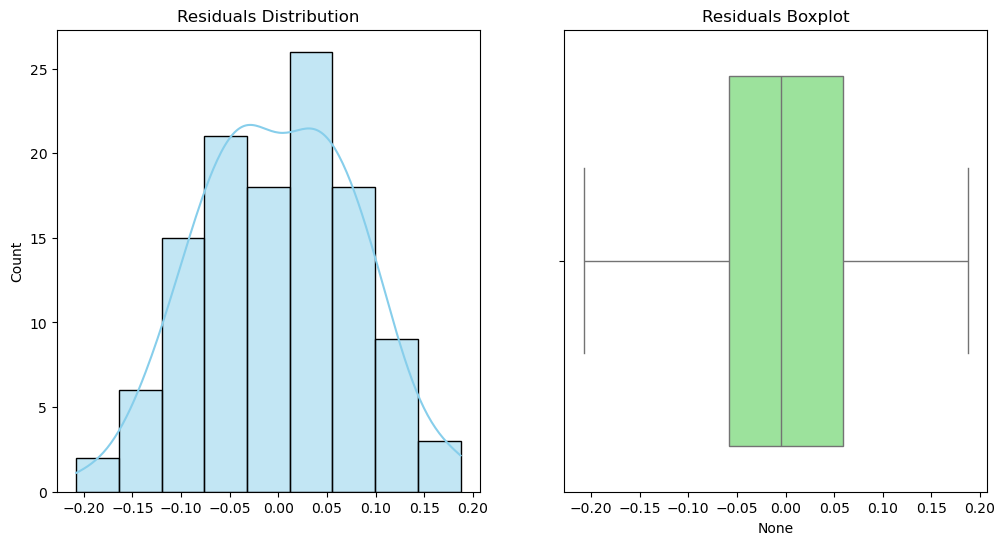

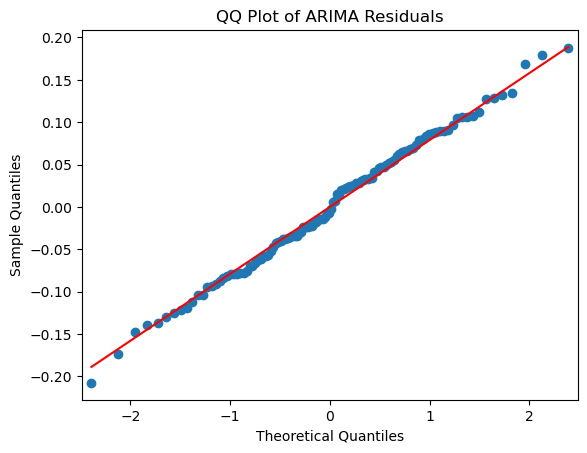

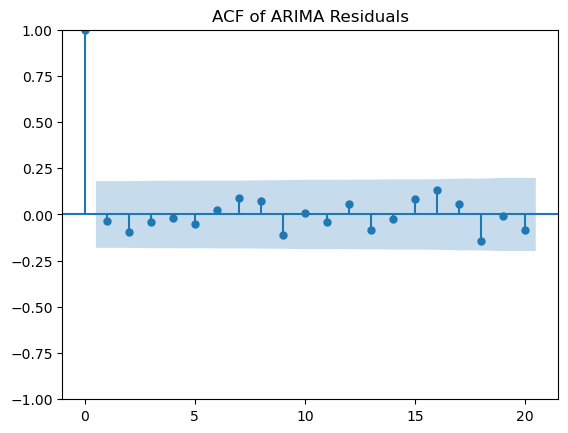

In [ ]:
# %% [Cell 20]: ARIMA Residual Diagnostics
residuals = model_fit.resid

# Plot residual distribution and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Residuals Distribution")
plt.subplot(1,2,2)
sns.boxplot(x=residuals, color='lightgreen')
plt.title("Residuals Boxplot")
plt.show()

# Q-Q plot for residuals
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of ARIMA Residuals")
plt.show()

# ACF plot of residuals
plot_acf(residuals, lags=20)
plt.title("ACF of ARIMA Residuals")
plt.show()